# **Uploading the Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import shutil

In [3]:
def train_validate_split(validation_size=0.2):
  all_images = os.listdir('/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers')

  # Making directors
  os.makedirs('./input')
  shutil.rmtree('./input')
  for dirs in all_images:
    os.makedirs(f'./input/train/{dirs}')
    os.makedirs(f'./input/validate/{dirs}')
    index_to_split = int(len(os.listdir(f'/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/{dirs}')) - len(os.listdir(f'/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/{dirs}')) * validation_size)
    train = f'/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/{dirs}'
    train = os.listdir(train)
    train = train[:index_to_split]
    validate = f'/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/{dirs}'
    validate = os.listdir(validate)
    validate = validate[index_to_split:]

    for images in train:
      shutil.copyfile(f'/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/{dirs}/{images}', f'/content/input/train/{dirs}/{images}')
    for images in validate:
      shutil.copyfile(f'/content/drive/MyDrive/Datasets/Flowers-Dataset/flowers/{dirs}/{images}', f'/content/input/validate/{dirs}/{images}')

  print('Successfully Completed')

train_validate_split(0.20)

Successfully Completed


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# **Image Augumentation**

In [5]:
train_idg = ImageDataGenerator(rescale=1/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

validate_idg = ImageDataGenerator(rescale=1/255.0)

In [6]:
train_iter = train_idg.flow_from_directory(
    '/content/input/train',
    batch_size = 100,
    class_mode = 'categorical',
    target_size = (64,64)
)

validate_iter = validate_idg.flow_from_directory(
    '/content/input/validate',
    batch_size = 50,
    class_mode = 'categorical',
    target_size = (64,64)
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


# **Creating a model**
**Adding Layers**

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(32,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
])

**Compiling the model**

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

**Fitting the model**

In [9]:
classifier = model.fit(train_iter,
                       steps_per_epoch=len(train_iter),
                       epochs=25,
                       validation_data=validate_iter,
                       validation_steps=len(validate_iter))

Epoch 1/25
35/35 [==============================] - 22s 393ms/step - loss: 1.5241 - accuracy: 0.3062 - val_loss: 1.2333 - val_accuracy: 0.4705
Epoch 2/25
35/35 [==============================] - 14s 387ms/step - loss: 1.2164 - accuracy: 0.4823 - val_loss: 1.1470 - val_accuracy: 0.4948
Epoch 3/25
35/35 [==============================] - 14s 397ms/step - loss: 1.1322 - accuracy: 0.5264 - val_loss: 1.1046 - val_accuracy: 0.5087
Epoch 4/25
35/35 [==============================] - 13s 387ms/step - loss: 1.0858 - accuracy: 0.5675 - val_loss: 1.0165 - val_accuracy: 0.6092
Epoch 5/25
35/35 [==============================] - 14s 395ms/step - loss: 1.0418 - accuracy: 0.5863 - val_loss: 0.9644 - val_accuracy: 0.6266
Epoch 6/25
35/35 [==============================] - 13s 384ms/step - loss: 0.9917 - accuracy: 0.6101 - val_loss: 1.0231 - val_accuracy: 0.6035
Epoch 7/25
35/35 [==============================] - 13s 383ms/step - loss: 0.9664 - accuracy: 0.6243 - val_loss: 0.9456 - val_accuracy: 0.6254

**Saving the model**

In [10]:
model_save = model.save('model.h5')

# **Testing the model**

In [11]:
classes = train_iter.class_indices
classes

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [13]:
test_img = image.load_img('/content/drive/MyDrive/Datasets/Flowers-Dataset/test_image.jpg',target_size= (64,64))

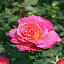

In [14]:
test_img

In [15]:
x = image.img_to_array(test_img)
x = np.expand_dims(x, axis=0)
x = x/255.0

In [16]:
model.predict(x)

array([[9.4454396e-01, 1.0688652e-03, 9.9846894e-01, 8.7499409e-04,
        9.9825650e-01]], dtype=float32)

In [17]:
pred = np.argmax(model.predict(x))
list(classes.items())[pred][0]

'rose'